<a href="https://colab.research.google.com/github/HerbertMariano/time-series-forecasting/blob/main/mancha_solar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from xgboost import XGBRegressor
from skopt import BayesSearchCV
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv')

In [3]:
df.sort_values('Month',inplace=True)
df.set_index('Month',inplace=True)

In [4]:
features = ['Sunspots']
target = []

In [5]:
for i in range(1,12):
    df[f'Sunspots-{i}'] = df['Sunspots'].shift(i)
    features.append(f'Sunspots-{i}')

for i in range(1,3):
    df[f'target-{i}'] = df['Sunspots'].shift(-i)
    target.append(f'target-{i}')

In [6]:
df.dropna(inplace=True)

<AxesSubplot: xlabel='Month'>

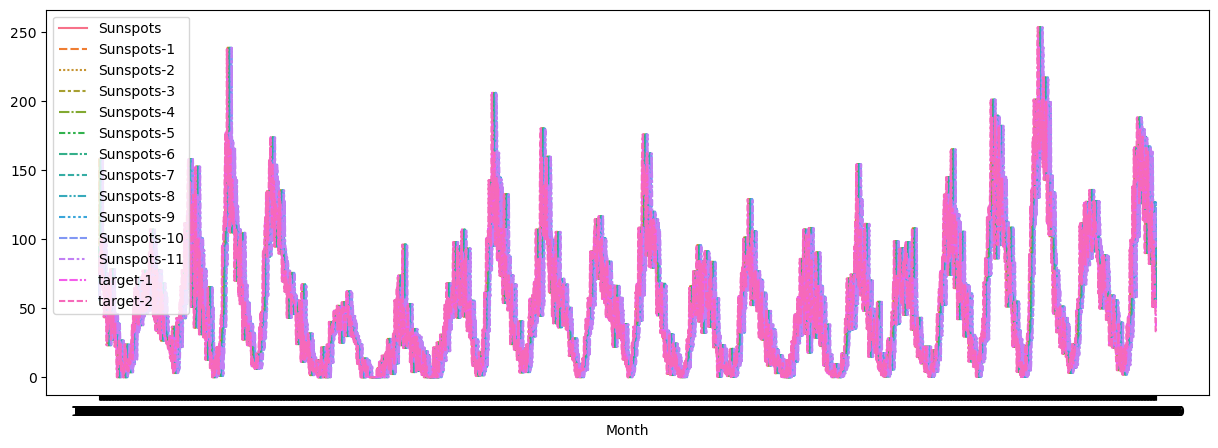

In [7]:
fig,ax = plt.subplots(figsize=(15,5))
sns.lineplot(data=df)

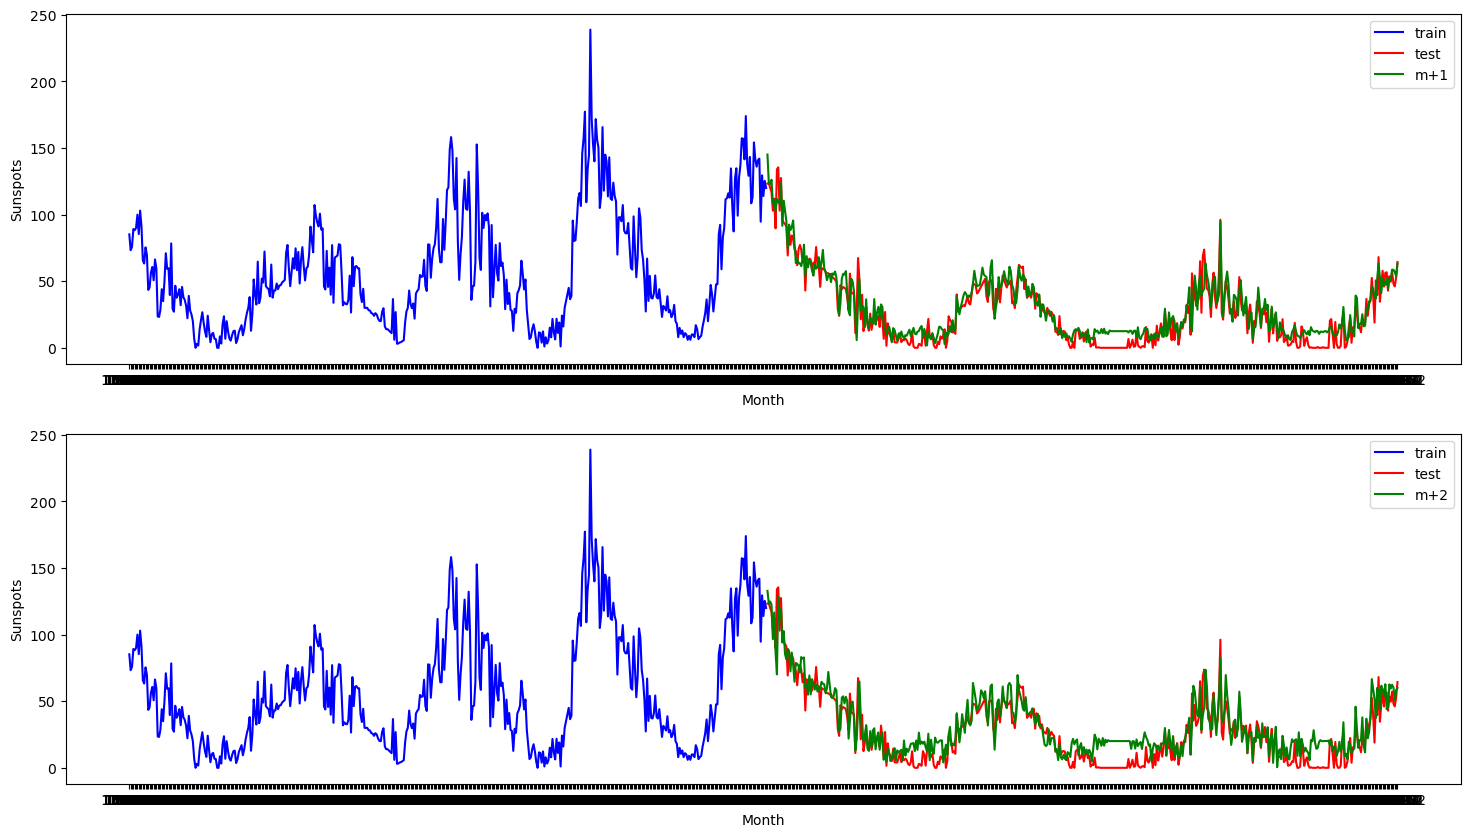

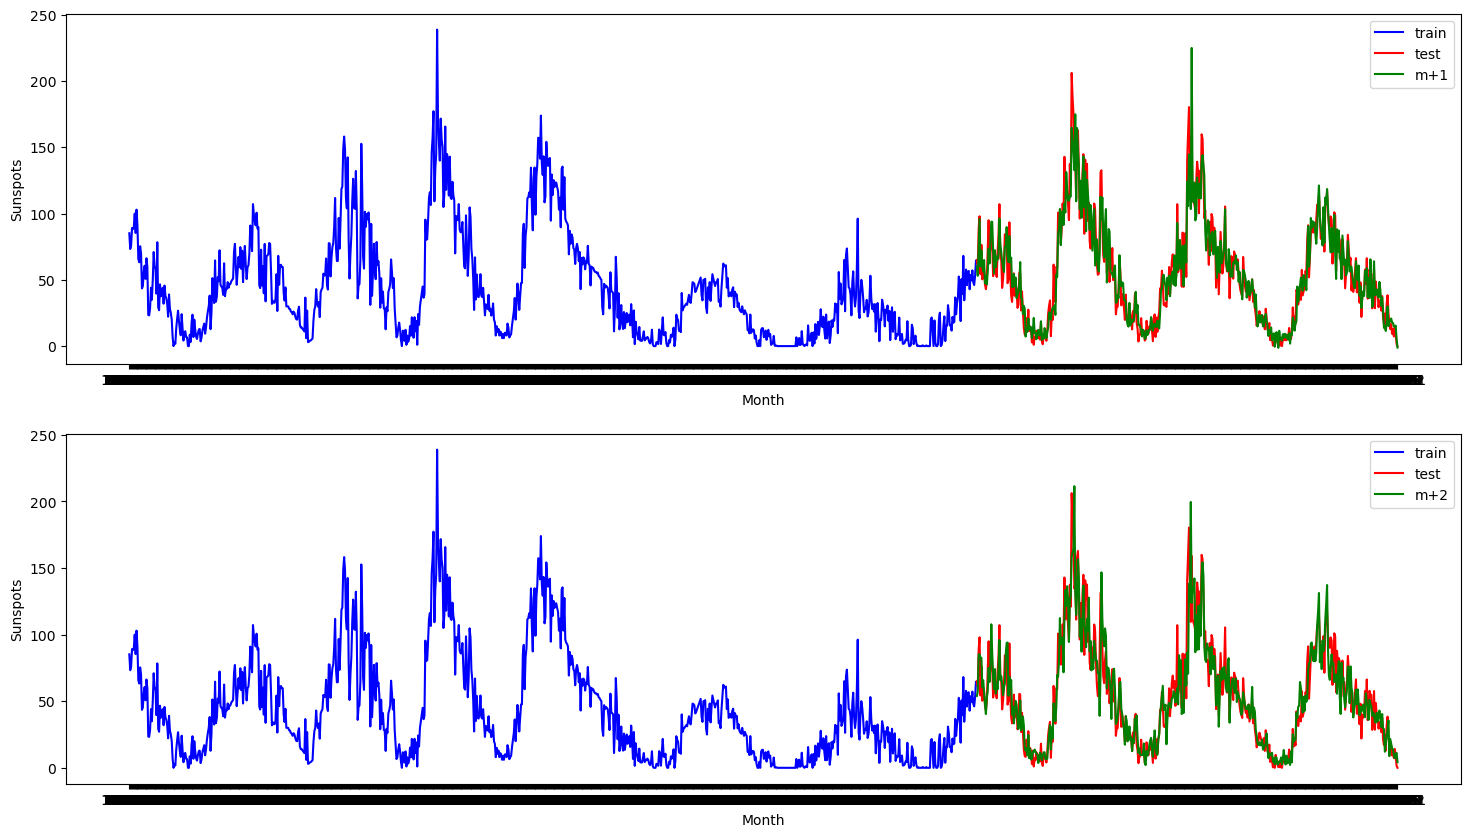

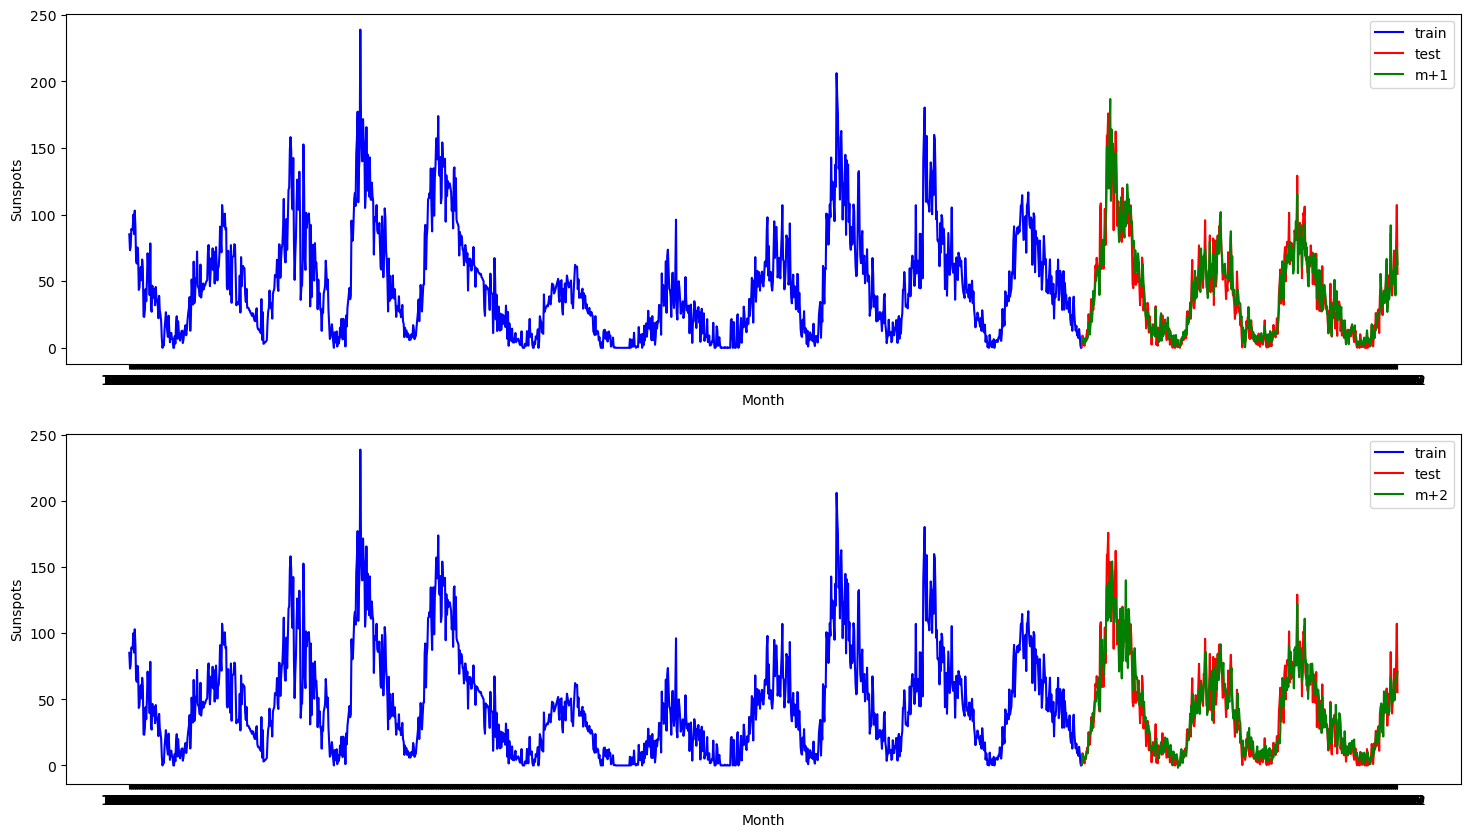

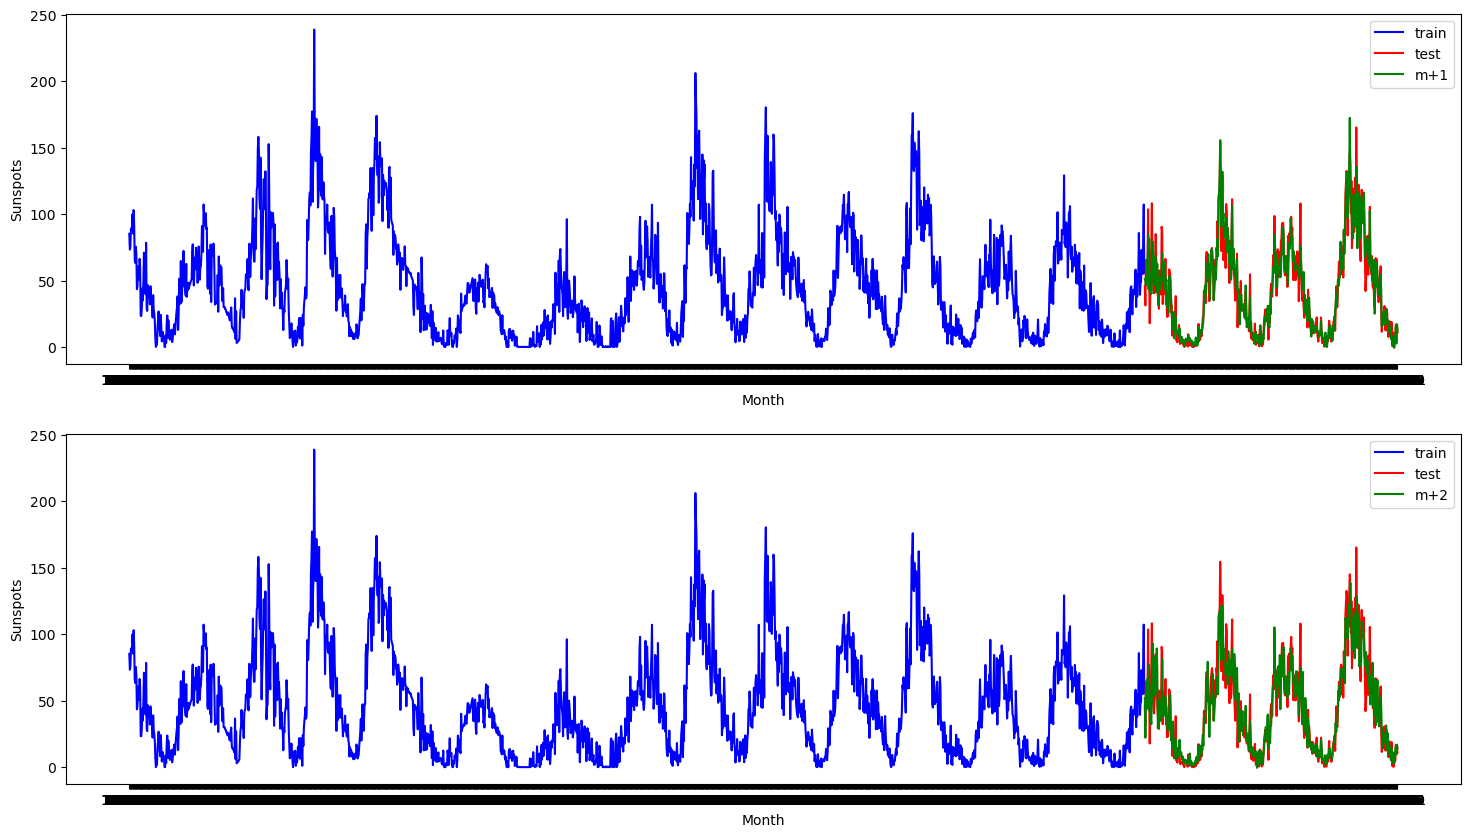

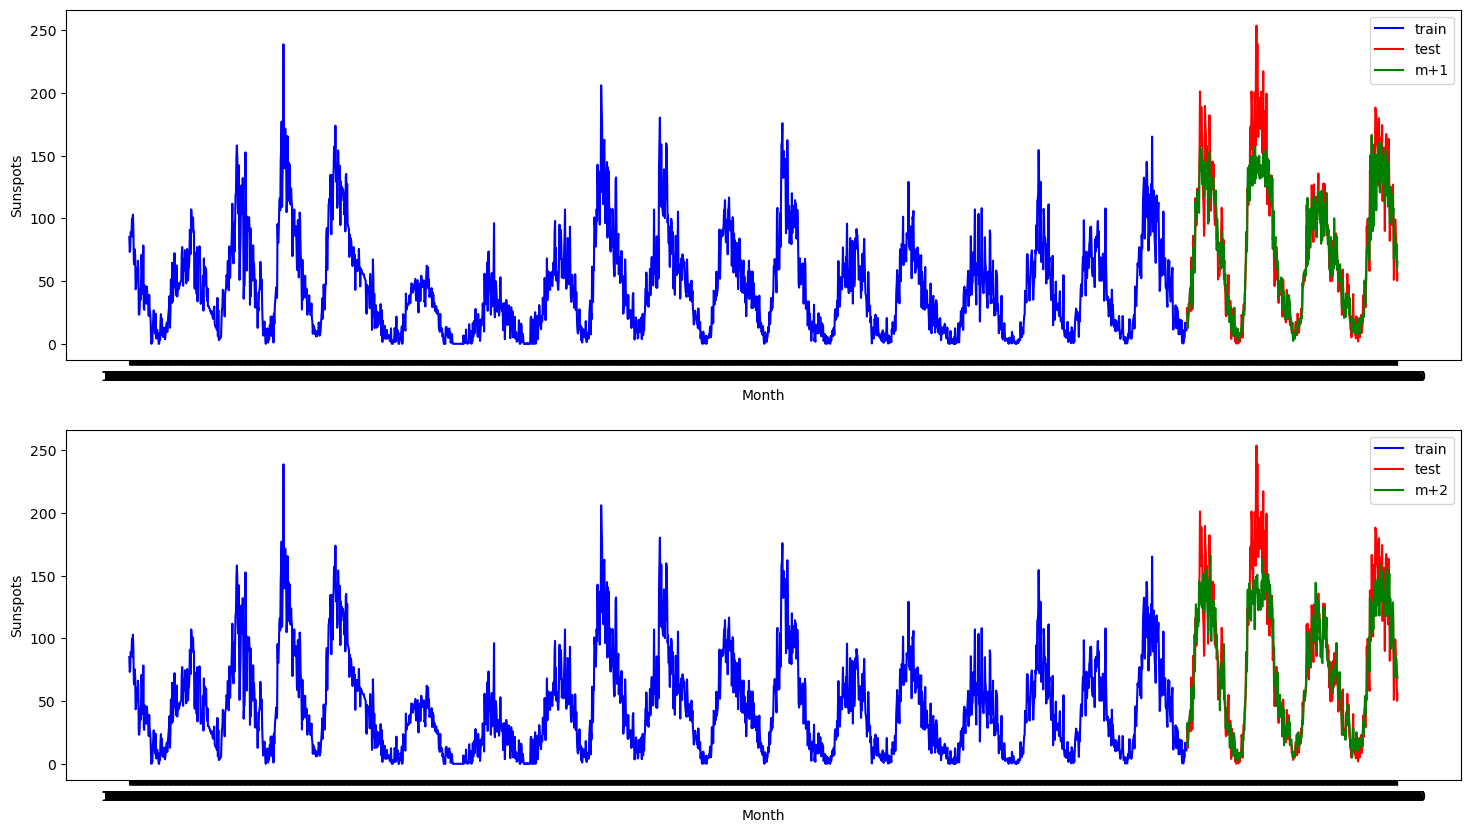

In [13]:
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
model = XGBRegressor()

for train, test in tscv.split(df):
    model.fit(df[features].iloc[train],df[target].iloc[train])
    pred = model.predict(df[features].iloc[test])
    pred = pd.DataFrame(pred,columns=['pred-1','pred-2'])
    pred['Month'] = df.index[test]
    pred.set_index('Month',inplace=True)

    fig,ax = plt.subplots(2,figsize=(18,2*5))
    sns.lineplot(data=df['Sunspots'][train],label='train',color='blue',ax=ax[0])
    sns.lineplot(data=df['Sunspots'][test],label='test',color='red',ax=ax[0])
    sns.lineplot(data=pred['pred-1'],label='m+1',color='green',ax=ax[0])
    sns.lineplot(data=df['Sunspots'][train],label='train',color='blue',ax=ax[1])
    sns.lineplot(data=df['Sunspots'][test],label='test',color='red',ax=ax[1])
    sns.lineplot(data=pred['pred-2'],label='m+2',color='green',ax=ax[1])
    